<a href="https://colab.research.google.com/github/BasilaThasni/DSML-Python-Tasks/blob/main/Task9_EDA_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory data analysis (EDA) on Iris Dataset using Python

> Add blockquote




You can easily download the dataset from below link. \
https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

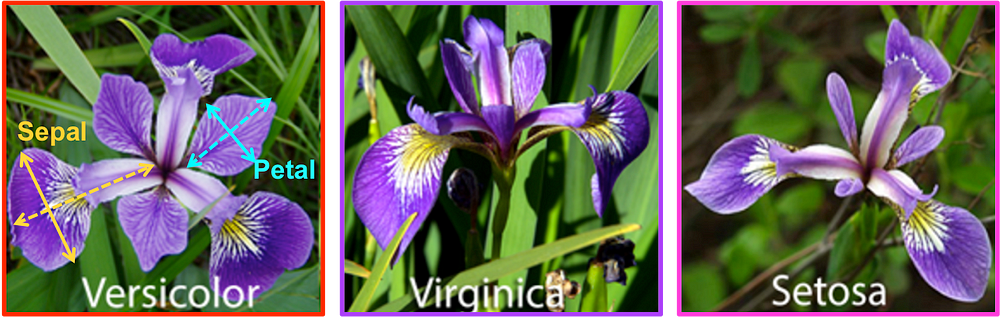

In [ ]:
!wget https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

--2024-09-03 16:31:21--  https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716 (3.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.63K  --.-KB/s    in 0s      

2024-09-03 16:31:21 (30.7 MB/s) - ‘iris.csv’ saved [3716/3716]



##Understanding the dataset

Here we can see that given 4 features i.e sepal length, sepal width, petal length, and petal width determine whether a flower is Setosa, Versicolor or Virginica.

* Sepal length,Sepal width, Petal length, Petal width are called feature/Variable/Input-variable/Independent-variable

* Species are called Labels/Dependent-variable/out-variable/class/class-label/Response label

##Importing libraries and loading the file


In [12]:
from google.colab import files
uploaded = files.upload()


Saving iris.csv to iris.csv


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = pd.read_csv("iris.csv")

In [14]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
print(iris.shape) #prints no. of row and columns


(150, 5)


In [16]:
print(iris.columns) #prints name of columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [17]:
iris["species"].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


As you can see after execution of this `iris["species"].value_counts()` ,the data distribution among setosa, virginica, versicolor are equal so iris dataset is a `Balanced dataset` (as the number of data points for every class is 50).



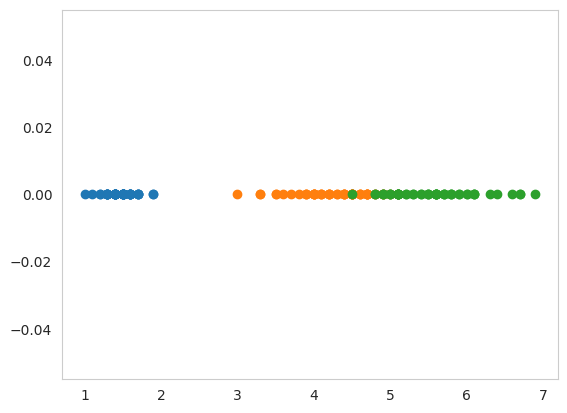

In [19]:
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
plt.plot(iris_setosa["petal_length"],np.zeros_like(iris_setosa["petal_length"]), 'o')
plt.plot(iris_versicolor["petal_length"],np.zeros_like(iris_versicolor["petal_length"]), 'o')
plt.plot(iris_virginica["petal_length"],np.zeros_like(iris_virginica["petal_length"]), 'o')
plt.grid()
plt.show()

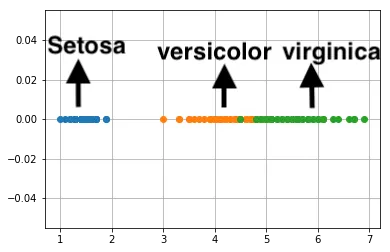

###Observation() | Conclusion

* Green points are Virginica, orange points are Versicolor and blue points are Setosa
* Virginica and Versicolor are overlapping
* 1D Scatter are very hard to read and understand

##2D scatter plot


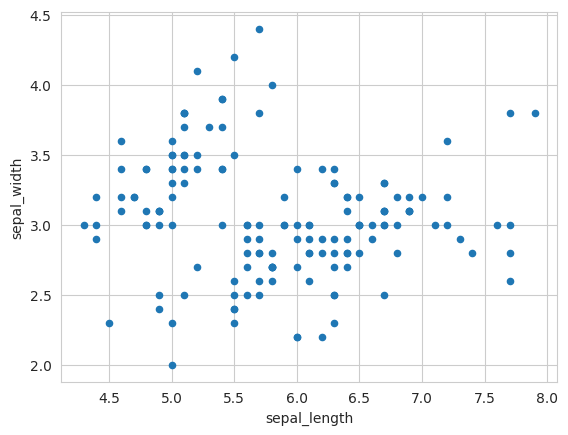

In [20]:
iris.plot(kind="scatter",x="sepal_length",y="sepal_width")
plt.show()

In the above figure, we are’t able to understand which is setosa or versicolor or virginica flower because all points are in same colour. It cannot make much sense out it



So let’s try to plot 2-D Scatter plot with colour for each flower.

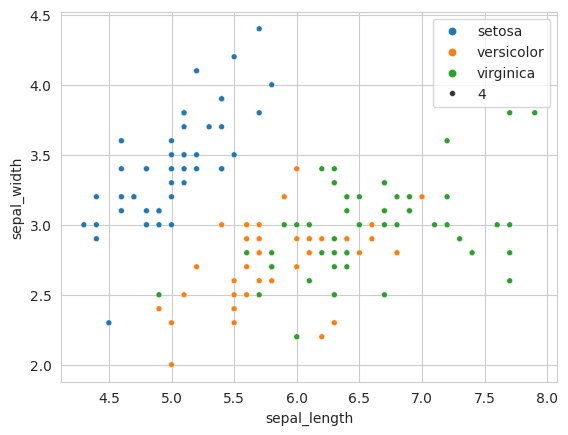

In [21]:
sns.set_style("whitegrid");
sns.scatterplot(iris,x="sepal_length",y="sepal_width",hue="species",size=4)
plt.legend()
plt.show()

if (3<sepal_length<5.8) and 2.3<sepal_width<4.5:
setosa

###Observation(s) | Conclusion

* Blue points can be easily separated from red and green by drawing a line.
* But red and green data points cannot be easily separated.
* Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
* Separating Versicolor from Viginica is much harder as they have considerable overlap.

##3D Scatter Plot


In [22]:
import plotly.express as px
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',color='species')
fig.show()


Here we are using plotly library for plotting as you can see we have used sepal length on the x-axis, sepal width on the y-axis and petal length on the z-axis.

A 3D plot will be used for three variables or dimensions. However, what would do if we have more than 3 dimensions or features in our dataset as we humans do have the capability to visualize more than 3 dimensions?
One solution to this problem is `pair plots`.

##Pair plots

A pairs plot allows us to see both distribution of single variables and relationships between two variables. \

For example, let’s say we have four features ‘sepal length’, ‘sepal width’, ‘petal length’ and ‘petal width’ in our iris dataset. In that case, we will have 4C2 plots i.e. 6 unique plots.

The pairs in this case will be :

1. sepal length, sepal width
2. sepal length, petal length
3. sepal length, petal width
4. sepal width, petal length
5. sepal width, petal width
6. petal length, petal width

So, here instead of trying to visualize four dimensions which is not possible. We will look into 6 2D plots and try to understand the 4-dimensional data in the form of a matrix.



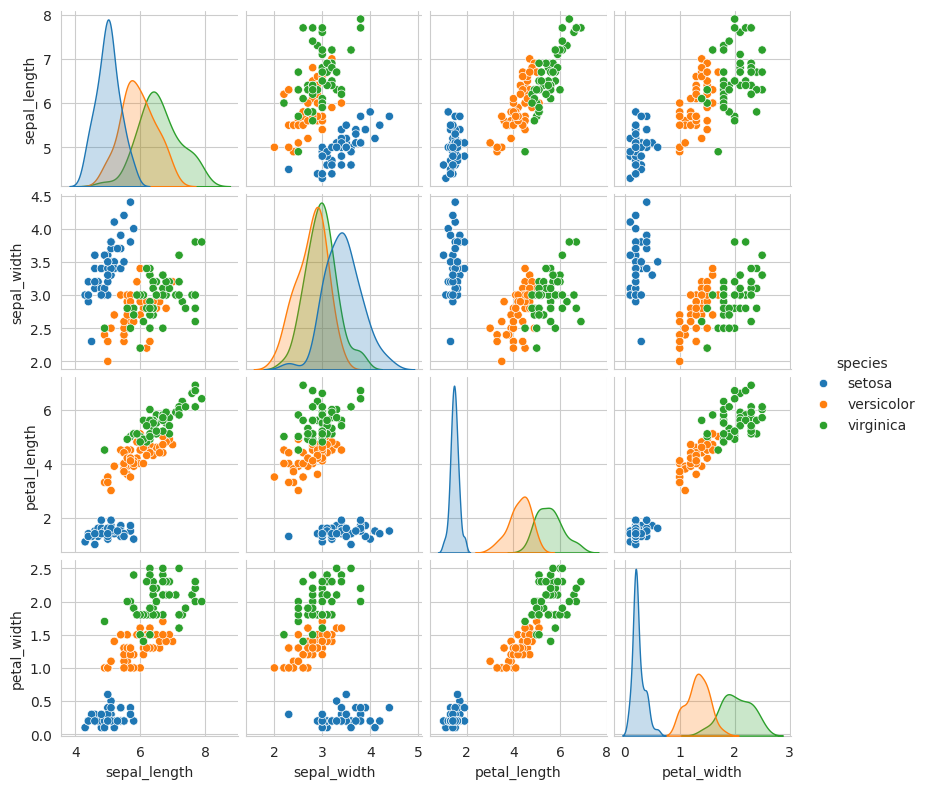

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")

sns.set_style("whitegrid");
sns.pairplot(iris,hue = "species",height=2);
plt.show()

As Seen Above, The Pair Plots Can Be Divided Into Three Parts:

* The diagonal plot which showcases the histogram. The histogram allows us to see the PDF/Probability distribution of a single variable
* Upper triangle and lower triangle which shows us the scatter plot.
* The scatter plots show us the relationship between the features. These upper and lower triangles are the mirror image of each other.


```Pair plot will only plot the variables which are numerical.variables which are of String type, by default pair plot won’t plot automatically.If you want to plot, then you need to encode it as numerical. However, Seaborn will encode internally and assign a label to each unique value in the non-numerical values.```

###Limitation of Pair plot:-
If you have d features, you will have a pair plot of size dxd cells where each cell is a plot between a pair of features.So, pair plots are hard to use when we have high dimensional data. For high dimensional data we can use PCA, t-SNE.


###Observation(s) | Conclusion

* petal length and petal width are the most useful features to identify various flower types.
* While Setosa can be easily identified (linearly separable), virginica and Versicolor have some overlap (almost linearly separable).
* We can find “lines” and “if-else” conditions to build a simple model to classify the flower types.

##Histogram and Introduction of PDF

A histogram is an accurate graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable (quantitative variable).To construct a histogram, the first step is to `bin` the range of values — that is, divide the entire range of values into a series of intervals — and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable.



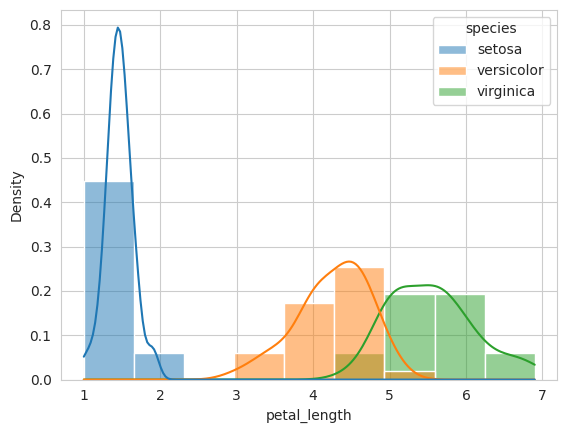

In [6]:
sns.histplot(iris,x="petal_length",hue="species",kde=True,stat="density")
plt.show()

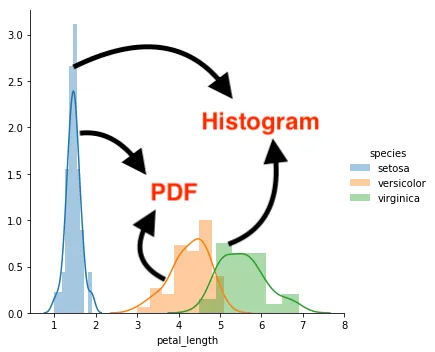

`PDF is smoothness of histogram`



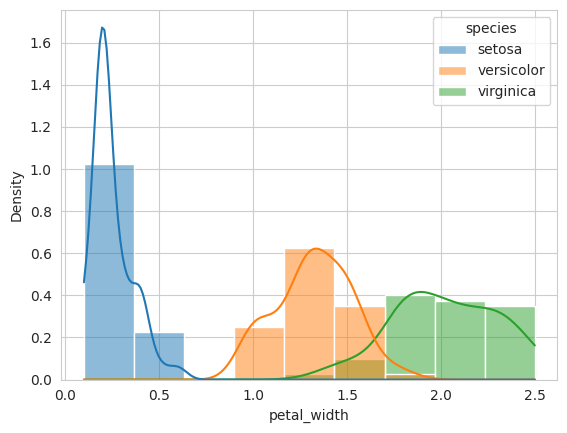

In [7]:
sns.histplot(iris,x="petal_width",hue="species",kde=True,stat="density")
plt.show()

###Observation(s) | Conclusion

* As we compare petal length and petal width then petal length the setosa are better separable than using patel width
* There is overlap between versicolor and virginica

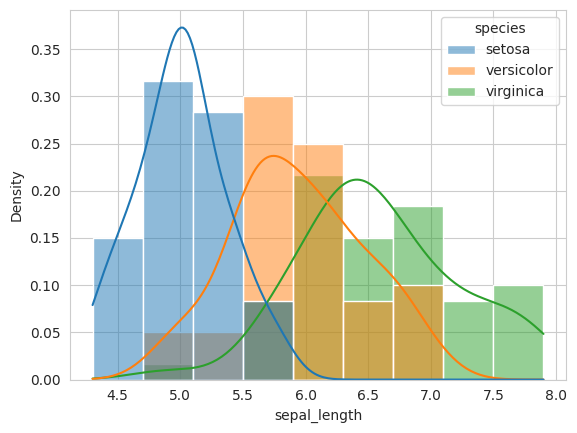

In [8]:
sns.histplot(iris,x="sepal_length",hue="species",kde=True,stat="density")
plt.show()

###Observation(s) | Conclusion

* Here we can’t separate any class because all of them are overlapped
* From above observations we can say that Sapel length is worst than Petal length and Petal width.

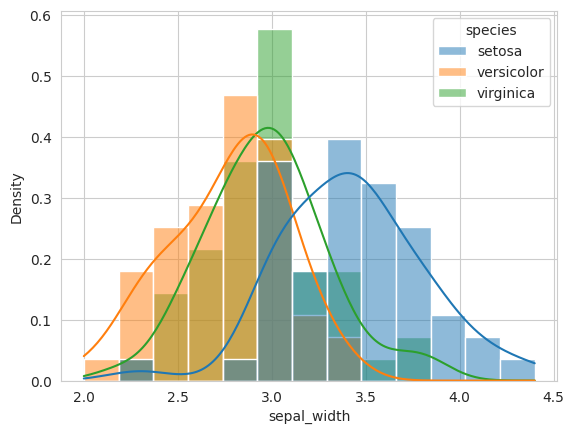

In [9]:
sns.histplot(iris,x="sepal_width",hue="species",kde=True,stat="density")
plt.show()

###Observation(s) | Conclusion

* And as we can see virginica and versicolor are fully overlapped.


###Data Insights:
* The pdf curve of Iris Setosa ends roughly at 2.1
* If petal length < 2.1, then species is Iris Setosa
* The point of intersection between pdf curves of Versicolor and Virginica is roughly at 4.8
* If petal length > 2.1 and petal length < 4.8 then species is Iris Versicolor
* If petal length > 4.8 then species is Iris Virginica

#Calculating PDF Points

In [16]:
import numpy as np
np.histogram(iris_setosa['petal_length'], bins=10, density = True)


(array([0.22222222, 0.22222222, 0.44444444, 1.55555556, 2.88888889,
        2.88888889, 1.55555556, 0.88888889, 0.        , 0.44444444]),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]))

In [17]:
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density = True)

In [18]:
counts

array([0.22222222, 0.22222222, 0.44444444, 1.55555556, 2.88888889,
       2.88888889, 1.55555556, 0.88888889, 0.        , 0.44444444])

In [19]:
sum(counts)

11.11111111111111

In [20]:
counts[1]/sum(counts)

0.02000000000000003

Prrinting the counts for histogram
 [0.22222222 0.22222222 0.44444444 1.55555556 2.88888889 2.88888889
 1.55555556 0.88888889 0.         0.44444444]
Sum of count is
 11.11111111111111
Printing Edges of bins 
 [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
PDF is as followes  
 [0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]


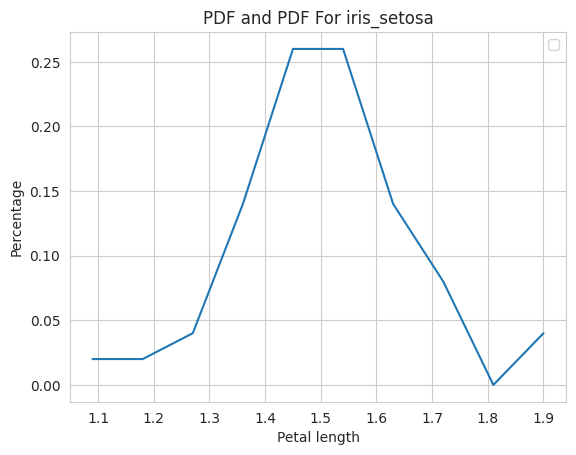

In [21]:
print("Prrinting the counts for histogram\n",counts)
pdf = counts/(sum(counts))
print("Sum of count is\n",sum(counts))
print("Printing Edges of bins \n",bin_edges)
print("PDF is as followes  \n",pdf);

plt.gca().legend(('Pdf'))
plt.title('PDF and PDF For iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.plot(bin_edges[1:],pdf)


#Calculating CDF Points


CDF Is as followes
 [0.02 0.04 0.08 0.22 0.48 0.74 0.88 0.96 0.96 1.  ]


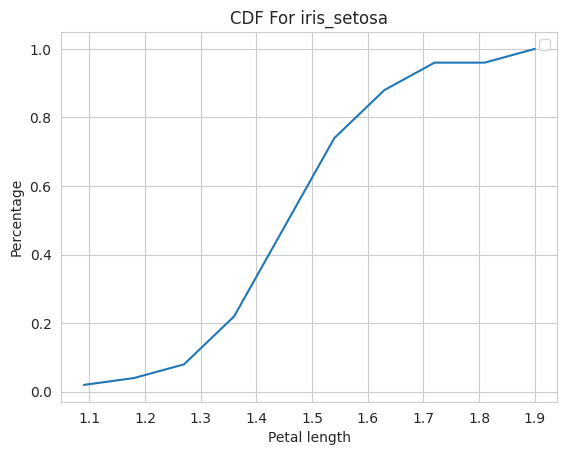

In [22]:
cdf = np.cumsum(pdf)
print("CDF Is as followes\n",cdf)
plt.gca().legend(('Cdf'))
plt.title('CDF For iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")

plt.plot(bin_edges[1:],cdf)

In [23]:
cdf

array([0.02, 0.04, 0.08, 0.22, 0.48, 0.74, 0.88, 0.96, 0.96, 1.  ])

[0.22222222 0.22222222 0.44444444 1.55555556 2.88888889 2.88888889
 1.55555556 0.88888889 0.         0.44444444]
[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


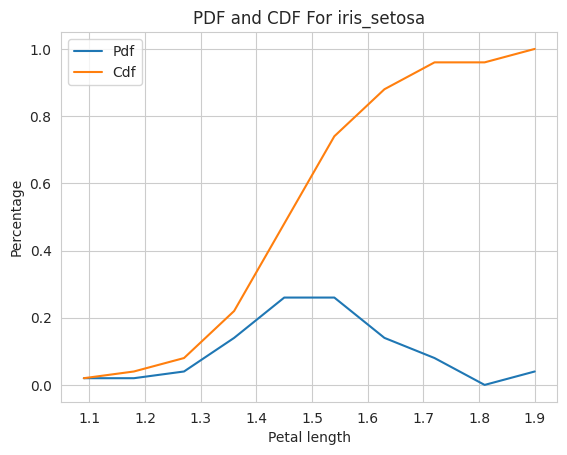

In [24]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10,
                                 density = True)

print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.gca().legend(('Pdf','Cdf'))
plt.title('PDF and CDF For iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.show();

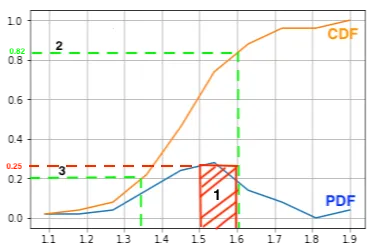

* 25% of point typically have their petal length between 1.5 and 1.6 called PDF
* There are 82% of setosa flower that have their petal length is less than 1.6(PL ≤ 1.6)
* There are 20% of setosa flower have their petal length is less than 1.3


[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


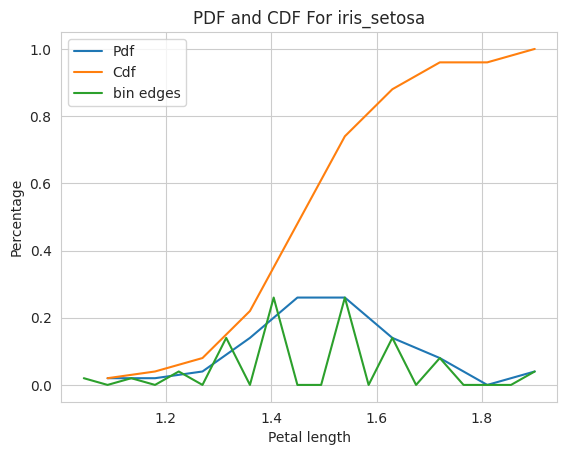

In [26]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20,
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.gca().legend(('Pdf','Cdf','bin edges'))
plt.title('PDF and CDF For iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.show();

#PDF and CDF For all species

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


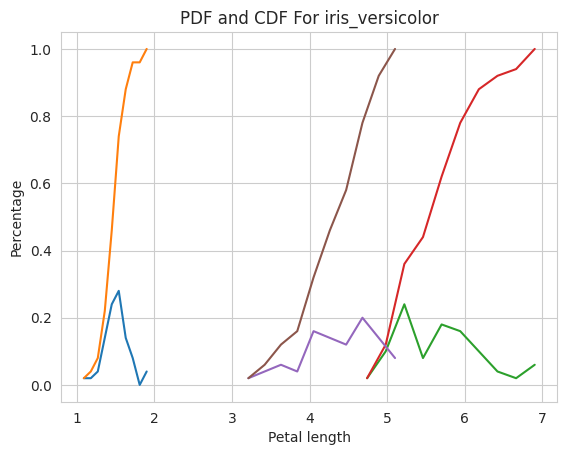

In [ ]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF For iris_versicolor')
plt.xlabel("Petal length")
plt.ylabel("Percentage")

plt.show();

#Mean, Variance, Std-deviation


In [27]:
#Mean, Variance, Std-deviation,
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Means:
1.4620000000000002
2.4137254901960787
5.5520000000000005
4.26

Std-dev:
0.17191858538273283
0.546347874526844
0.4651881339845203


#Median, Quantiles, Percentiles, IQR.

In [28]:
a=np.arange(0, 101)
a

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [29]:
np.percentile(a,99)

99.0

In [30]:
np.percentile(iris_setosa["petal_length"],25)

1.4

In [31]:
np.median(iris_setosa["petal_length"])

1.5

In [32]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


#Quantiles:-

Any set of data, arranged in ascending or descending order, can be divided into various parts, also known as partitions or subsets, regulated by quantiles. Quantile is a generic term for those values that divide the set into partitions of size n, so that each part represents 1/n of the set.

`x={5,6,9,11,13,20,26}`

* first quartile, or Q1 = 6
* second quartile, or Q2 = 11
* third quartile, or Q3 = 20

#Box-plot and whisker
A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary. It does not show a distribution in as much detail as a stem and leaf plot or histogram does, but is especially useful for indicating whether a distribution is skewed and whether there are potential unusual observations (outliers) in the data set.

Box-plot with whiskers: another method of visualising the 1-D scatter plot more intuitive

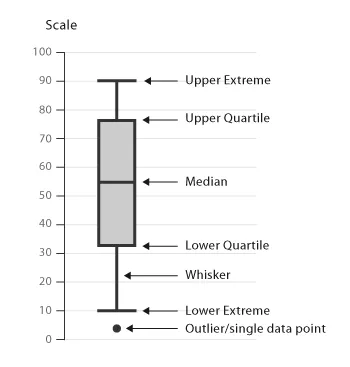


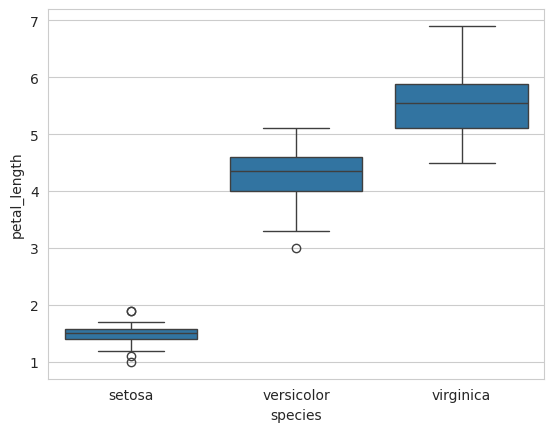

In [33]:
sns.boxplot(x="species",y="petal_length", data=iris)
plt.show()

More Details:
[link text](https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/)

<Axes: >

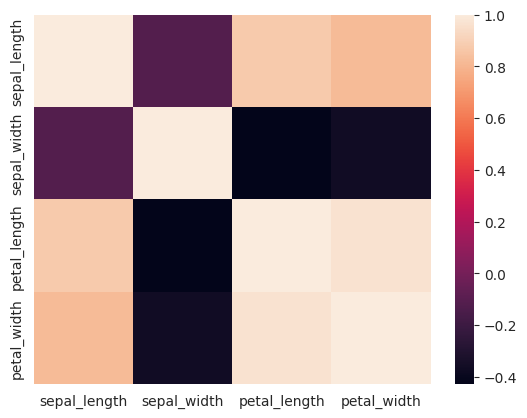

In [35]:
sns.heatmap(iris.drop('species', axis=1).corr(method='pearson')) # Drop the non-numeric column 'species' before calculating the correlation.

In [36]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'])

In [37]:
counts

array([ 1,  1,  2,  7, 13, 13,  7,  4,  0,  2])

In [38]:
bin_edges

array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ])

In [39]:
hist_center = []
for i,b in enumerate(bin_edges):
    if i > 0: hist_center.append((bin_edges[i-1]+bin_edges[i])/2.0)


In [40]:
hist_center

[1.045,
 1.135,
 1.225,
 1.315,
 1.4049999999999998,
 1.495,
 1.585,
 1.6749999999999998,
 1.7650000000000001,
 1.855]

In [41]:
CD = np.cumsum(counts)/np.max(np.cumsum(counts))

In [42]:
CD

array([0.02, 0.04, 0.08, 0.22, 0.48, 0.74, 0.88, 0.96, 0.96, 1.  ])

In [43]:
import numpy as np
l=np.array(list(range(0,101)))
l

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [44]:
l.mean()

50.0

In [45]:
np.median(l)

50.0

In [46]:
np.percentile(l,25)

25.0